In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# Eleventh Mixture 

Fontes:

$s_0$ = Rayleigh

$s_1$ = $\sum$ Uniformes

$s_2$ = Laplaciana

$s_3$ = $\chi ^2$

In [2]:
sources = np.loadtxt(source_path+'/'+'EleventhSource100Stats.txt')
matrix_A = np.loadtxt(source_path+'/'+'EleventhMixMatrix.txt')

x = np.loadtxt(obs_path+'EleventhMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [3]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.57414805,  0.26629191,  0.30969689],
       [ 0.57414805,  1.        ,  0.30418266,  0.29895747],
       [ 0.26629191,  0.30418266,  1.        ,  0.38072783],
       [ 0.30969689,  0.29895747,  0.38072783,  1.        ]])

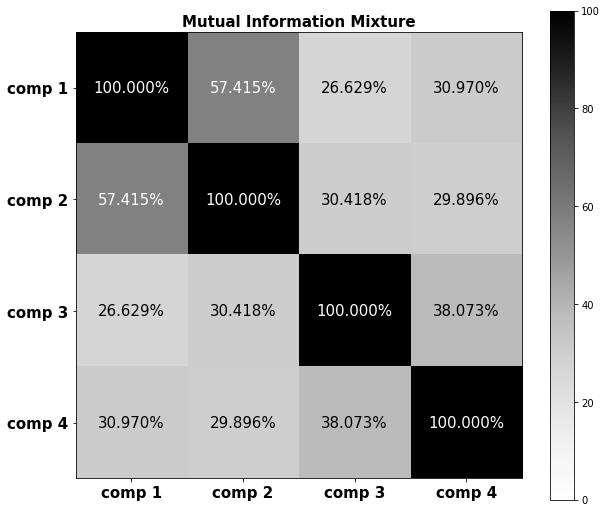

In [4]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run11_mix_MI_100',save=True)

In [5]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.15137827,  0.12852132,  0.16910631],
       [ 0.15137827,  1.        ,  0.18385479,  0.12601974],
       [ 0.12852132,  0.18385479,  1.        ,  0.11855069],
       [ 0.16910631,  0.12601974,  0.11855069,  1.        ]])

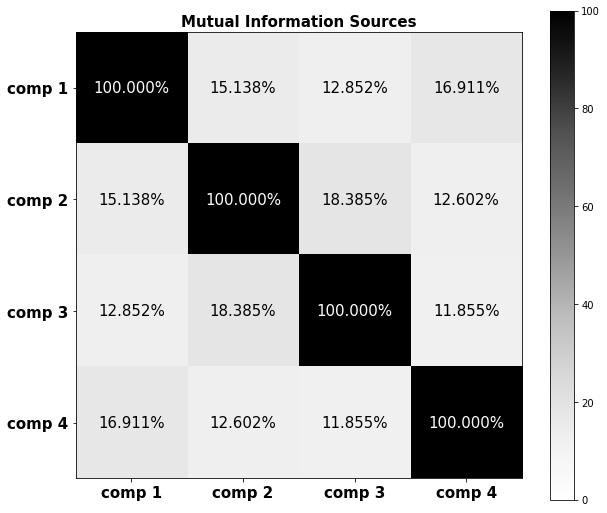

In [6]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run11_sources_MI_100',save=True)

In [7]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

([array([[ 0.46209803,  0.12163238,  0.19496082,  0.44199629],
         [ 0.54163529,  0.15742482,  0.17908634,  0.51287171],
         [ 0.59443204,  0.16355503,  0.14138069,  0.60546543],
         [ 0.53831366,  0.14002698,  0.100483  ,  0.55435262]]),
  array([[ 0.45589262,  0.58539583,  0.7540894 ,  0.68505181],
         [ 0.12438455,  0.16906723,  0.23940218,  0.17182033],
         [ 0.17961594,  0.16115376,  0.15228926,  0.0940355 ],
         [ 0.48901867,  0.61243439,  0.73214479,  0.75050335]])],
 array([[ 0.45899532,  0.35351411,  0.47452511,  0.56352405],
        [ 0.33300992,  0.16324603,  0.20924426,  0.34234602],
        [ 0.38702399,  0.16235439,  0.14683497,  0.34975046],
        [ 0.51366617,  0.37623069,  0.4163139 ,  0.65242799]]),
 array([[ 0.35288147,  0.14473943,  0.14709177,  0.34377173],
        [ 0.39610712,  0.11689808,  0.1119827 ,  0.30800762],
        [ 0.37838236,  0.2004176 ,  0.13287212,  0.40522988],
        [ 0.28474506,  0.18449067,  0.1115638 ,  0.3099

In [11]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 12
Time to converges the FastICA: 0.006 seconds


In [12]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 =  7.73887520406 E2 =  3.76021414014


In [13]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 1.        ,  0.10635538,  0.08326722,  0.11654747],
       [ 0.10635538,  1.        ,  0.18608199,  0.1562361 ],
       [ 0.08326722,  0.18608199,  1.        ,  0.14944366],
       [ 0.11654747,  0.1562361 ,  0.14944366,  1.        ]])

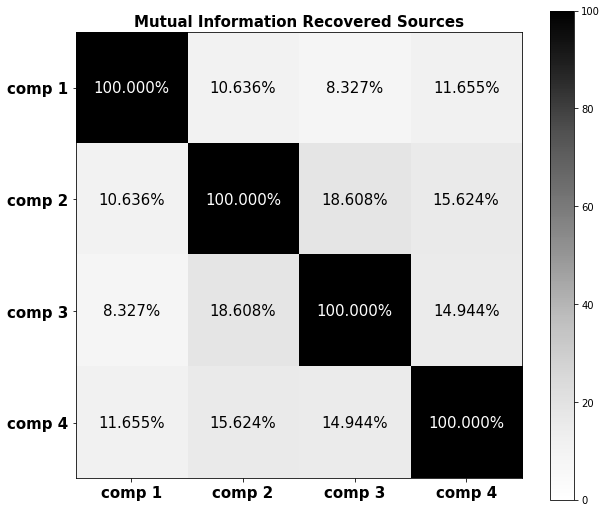

In [14]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run11_reco_MI_100',save=True)

In [15]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.20889876,  0.1829557 ,  0.28059208,  0.1666143 ],
       [ 0.11084293,  0.17471078,  0.24273779,  0.26579485],
       [ 0.14863739,  0.34505672,  0.25078405,  0.15534537],
       [ 0.26002769,  0.1796504 ,  0.07926586,  0.17150311]])

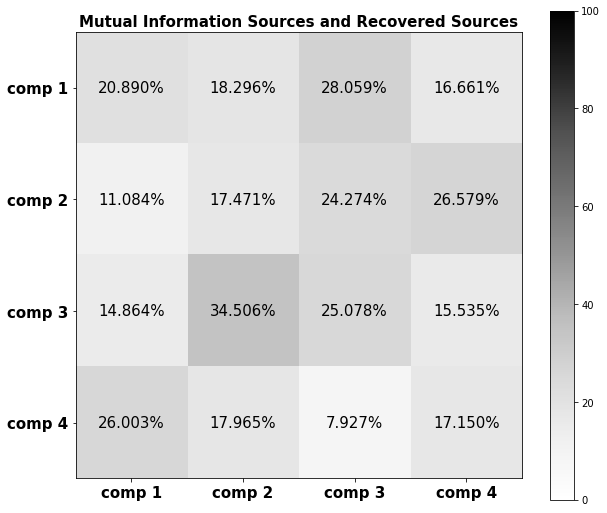

In [16]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run11_sourcesreco_MI_100',save=True)

In [25]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[3,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]
ordened_recovered_sources[3,:] = recovered_sources[0,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.28059208,  0.1666143 ,  0.1829557 ,  0.20889876],
       [ 0.24273779,  0.26579485,  0.17471078,  0.11084293],
       [ 0.25078405,  0.15534537,  0.34505672,  0.14863739],
       [ 0.07926586,  0.17150311,  0.1796504 ,  0.26002769]])

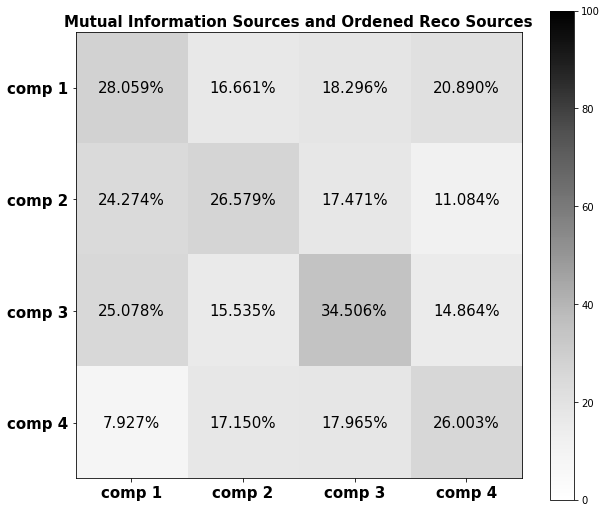

In [26]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run11_sourcesreco_ordened_MI_100',save=True)

In [27]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [28]:
SKL_div,JS_div

(array([[ 0.47558466,  0.28804814,  0.37378125,  0.46251758],
        [ 0.34263126,  0.10675862,  0.19199187,  0.28329504],
        [ 0.33674922,  0.15500982,  0.13329449,  0.34629432],
        [ 0.52035961,  0.25960995,  0.40129563,  0.44170462]]),
 array([[ 0.24310352,  0.23648887,  0.23118284,  0.23315431],
        [ 0.14170697,  0.09642615,  0.13232713,  0.11475764],
        [ 0.1718777 ,  0.11102512,  0.085956  ,  0.14216408],
        [ 0.24790569,  0.22379192,  0.2466813 ,  0.20940725]]))

In [29]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.243104 &  0.236489 &  0.231183 &  0.233154 \\
1 &  0.141707 &  0.096426 &  0.132327 &  0.114758 \\
2 &  0.171878 &  0.111025 &  0.085956 &  0.142164 \\
3 &  0.247906 &  0.223792 &  0.246681 &  0.209407 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.475585 &  0.288048 &  0.373781 &  0.462518 \\
1 &  0.342631 &  0.106759 &  0.191992 &  0.283295 \\
2 &  0.336749 &  0.155010 &  0.133294 &  0.346294 \\
3 &  0.520360 &  0.259610 &  0.401296 &  0.441705 \\
\bottomrule
\end{tabular}



In [30]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[  1.20000000e+01,   0.00000000e+00,   0.00000000e+00],
       [  6.00000000e-03,   0.00000000e+00,   0.00000000e+00],
       [  7.73887520e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.76021414e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.21463476e+00,   0.00000000e+00,   0.00000000e+00]])

# Using 1000 stats

In [31]:
sources = np.loadtxt(source_path+'/'+'EleventhSource1000Stats.txt')

x = np.loadtxt(obs_path+'EleventhMixture1000Stats.txt')


In [32]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.51285237,  0.19051753,  0.2383793 ],
       [ 0.51285237,  1.        ,  0.2208398 ,  0.22077319],
       [ 0.19051753,  0.2208398 ,  1.        ,  0.3022135 ],
       [ 0.2383793 ,  0.22077319,  0.3022135 ,  1.        ]])

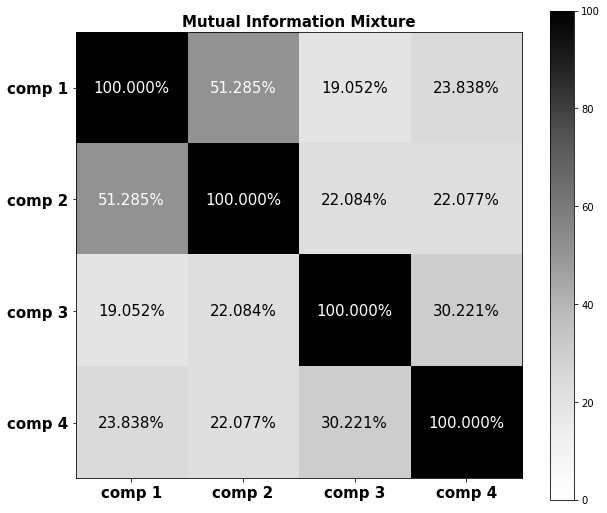

In [33]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run11_mix_MI_1k',save=True)

In [34]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.06078449,  0.04445516,  0.06948591],
       [ 0.06078449,  1.        ,  0.0605484 ,  0.06577867],
       [ 0.04445516,  0.0605484 ,  1.        ,  0.07079655],
       [ 0.06948591,  0.06577867,  0.07079655,  1.        ]])

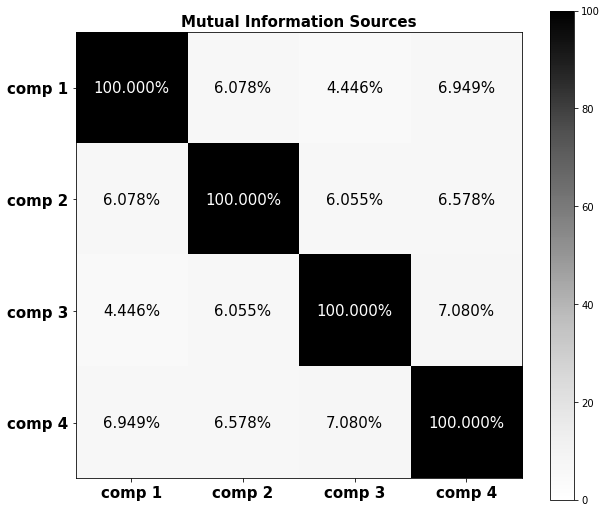

In [35]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run11_sources_MI_1k',save=True)

In [36]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 1200
Time to converges the FastICA: 0.646 seconds


In [37]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.05760797,  0.07052335,  0.07552868],
       [ 0.05760797,  1.        ,  0.06793328,  0.05334679],
       [ 0.07052335,  0.06793328,  1.        ,  0.06519196],
       [ 0.07552868,  0.05334679,  0.06519196,  1.        ]])

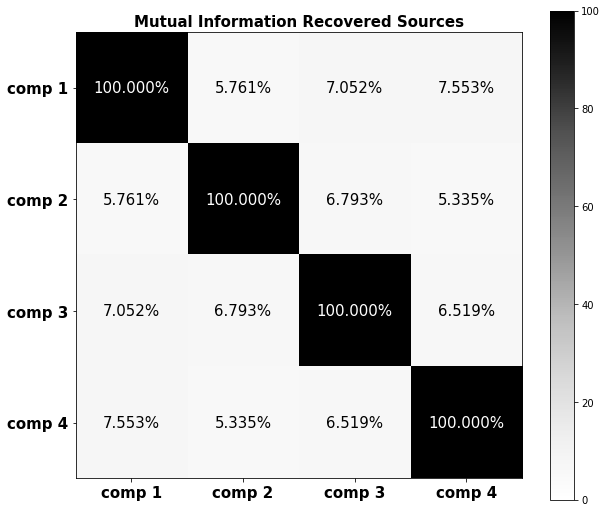

In [38]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run11_reco_MI_1k',save=True)

In [39]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.07413067,  0.04491783,  0.06006319,  0.4328674 ],
       [ 0.39381759,  0.06123818,  0.07847772,  0.08656646],
       [ 0.06141456,  0.70917776,  0.07160116,  0.05480229],
       [ 0.07116155,  0.06716869,  0.60493693,  0.06638901]])

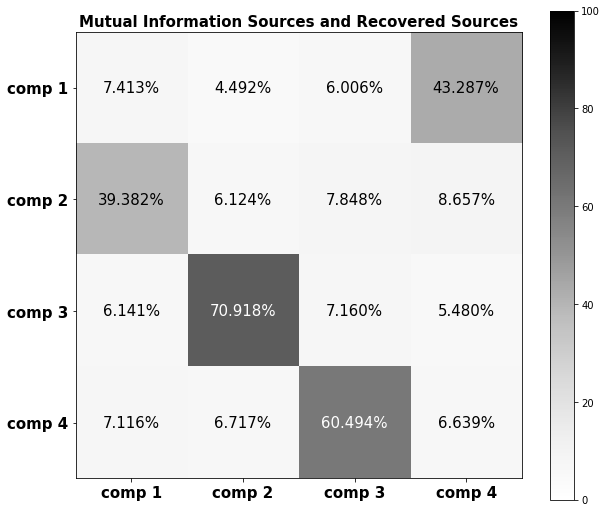

In [40]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run11_sourcesreco_MI_1k',save=True)

In [49]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = -1*recovered_sources[3,:]
ordened_recovered_sources[1,:] = recovered_sources[0,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]
ordened_recovered_sources[3,:] = -1*recovered_sources[2,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.4328674 ,  0.07413067,  0.04491783,  0.06006319],
       [ 0.08656646,  0.39381759,  0.06123818,  0.07847772],
       [ 0.05480229,  0.06141456,  0.70917776,  0.07160116],
       [ 0.06638901,  0.07116155,  0.06716869,  0.60493693]])

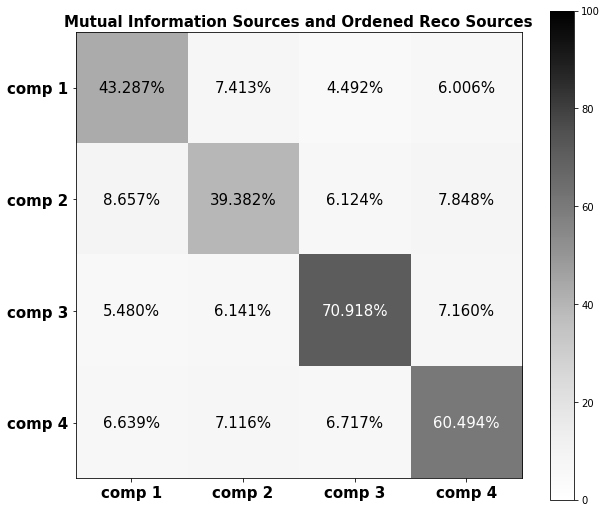

In [50]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run11_sourcesreco_ordened_MI_1k',save=True)

In [51]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [52]:
SKL_div,JS_div

(array([[ 0.19535865,  0.46389793,  0.63294688,  0.42148441],
        [ 0.38743513,  0.0958184 ,  0.40042095,  0.86539641],
        [ 0.4849052 ,  0.30031372,  0.0757558 ,  1.10030453],
        [ 0.50466293,  0.94975841,  0.75131659,  0.09220134]]),
 array([[ 0.09248921,  0.23558817,  0.29199915,  0.1623516 ],
        [ 0.21539018,  0.05657675,  0.15858125,  0.46468285],
        [ 0.31596712,  0.21127297,  0.04242614,  0.34352846],
        [ 0.27959455,  0.4605919 ,  0.57678991,  0.05041497]]))

In [53]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.092489 &  0.235588 &  0.291999 &  0.162352 \\
1 &  0.215390 &  0.056577 &  0.158581 &  0.464683 \\
2 &  0.315967 &  0.211273 &  0.042426 &  0.343528 \\
3 &  0.279595 &  0.460592 &  0.576790 &  0.050415 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.195359 &  0.463898 &  0.632947 &  0.421484 \\
1 &  0.387435 &  0.095818 &  0.400421 &  0.865396 \\
2 &  0.484905 &  0.300314 &  0.075756 &  1.100305 \\
3 &  0.504663 &  0.949758 &  0.751317 &  0.092201 \\
\bottomrule
\end{tabular}



In [54]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  1.20000000e+01,   1.20000000e+03,   0.00000000e+00],
       [  6.00000000e-03,   6.46000000e-01,   0.00000000e+00],
       [  7.73887520e+00,   1.11363781e+01,   0.00000000e+00],
       [  3.76021414e+00,   6.70773648e+00,   0.00000000e+00],
       [  6.21463476e+00,   7.38282196e+00,   0.00000000e+00]])

# Using 100K stats

In [55]:
sources = np.loadtxt(source_path+'/'+'EleventhSource100000Stats.txt')

x = np.loadtxt(obs_path+'EleventhMixture100000Stats.txt')


In [56]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.33908092,  0.0939243 ,  0.12601452],
       [ 0.33908092,  1.        ,  0.114441  ,  0.11216684],
       [ 0.0939243 ,  0.114441  ,  1.        ,  0.1795507 ],
       [ 0.12601452,  0.11216684,  0.1795507 ,  1.        ]])

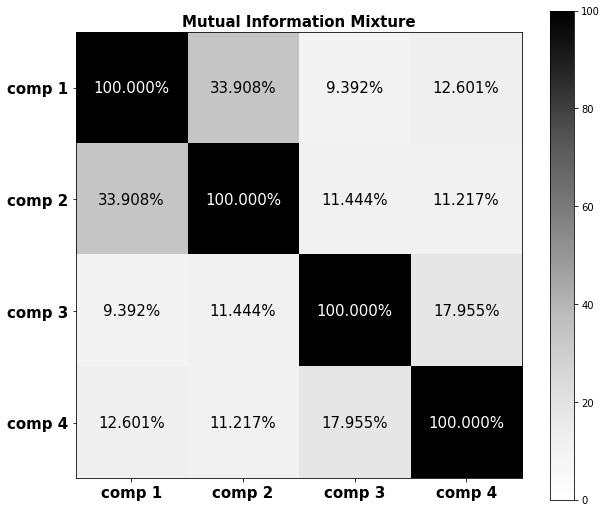

In [57]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run11_mix_MI_100k',save=True)

In [58]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.01155934,  0.00995409,  0.01003315],
       [ 0.01155934,  1.        ,  0.01008828,  0.01040058],
       [ 0.00995409,  0.01008828,  1.        ,  0.01504213],
       [ 0.01003315,  0.01040058,  0.01504213,  1.        ]])

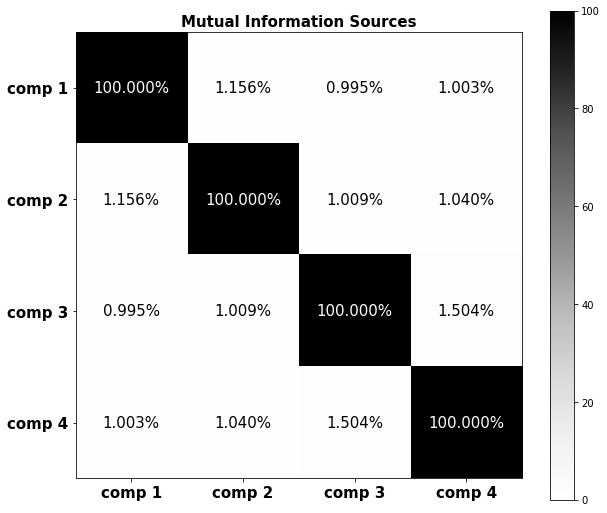

In [59]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run11_sources_MI_100k',save=True)

In [60]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 6
Time to converges the FastICA: 0.334 seconds


In [61]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.01233314,  0.01073952,  0.0101015 ],
       [ 0.01233314,  1.        ,  0.01019743,  0.01003424],
       [ 0.01073952,  0.01019743,  1.        ,  0.01510039],
       [ 0.0101015 ,  0.01003424,  0.01510039,  1.        ]])

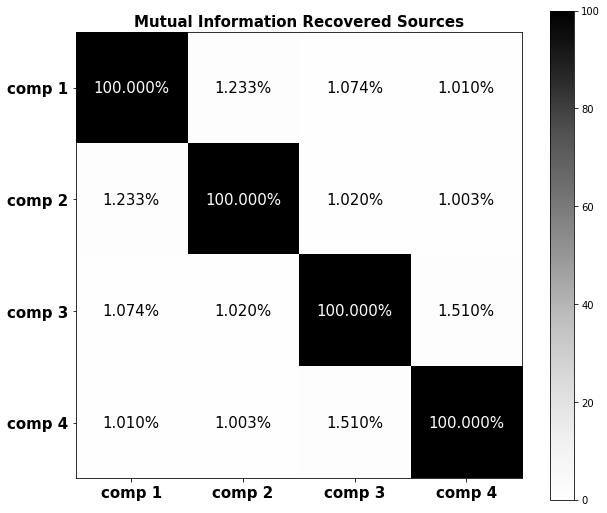

In [62]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run11_reco_MI_100k',save=True)

In [63]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.01229621,  0.62106905,  0.01007696,  0.00990371],
       [ 0.62265867,  0.01260914,  0.01036979,  0.01012824],
       [ 0.01020066,  0.00999179,  0.0151364 ,  0.91171369],
       [ 0.01067304,  0.01021268,  0.85655509,  0.01502462]])

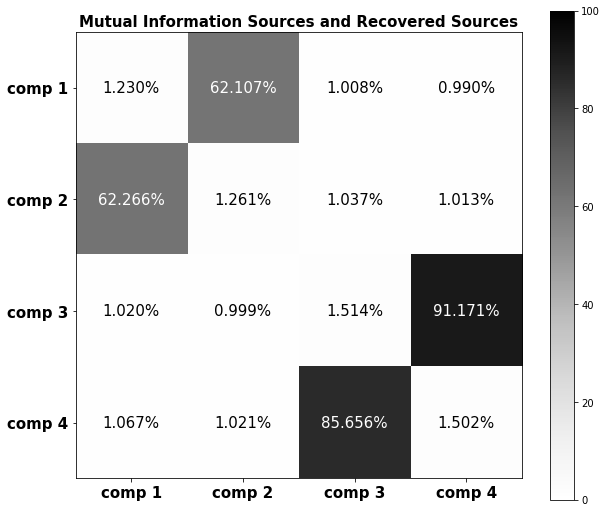

In [64]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run11_sourcesreco_MI_100k',save=True)

In [69]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = -1*recovered_sources[1,:]
ordened_recovered_sources[1,:] = recovered_sources[0,:]
ordened_recovered_sources[2,:] = recovered_sources[3,:]
ordened_recovered_sources[3,:] = recovered_sources[2,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.62106905,  0.01229621,  0.00990371,  0.01007696],
       [ 0.01260914,  0.62265867,  0.01012824,  0.01036979],
       [ 0.00999179,  0.01020066,  0.91171369,  0.0151364 ],
       [ 0.01021268,  0.01067304,  0.01502462,  0.85655509]])

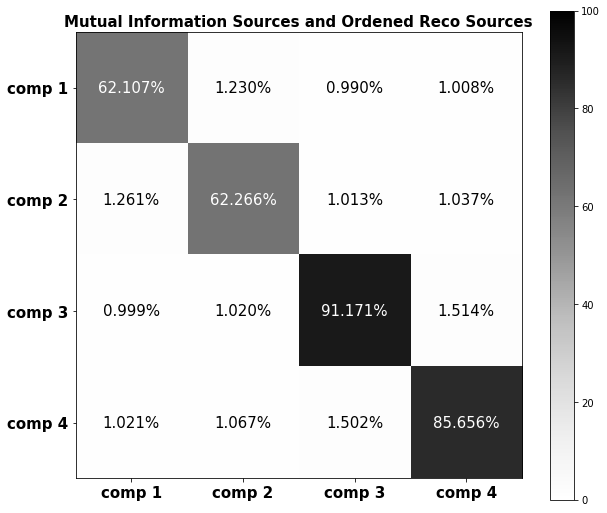

In [70]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run11_sourcesreco_ordened_MI_100k',save=True)

In [71]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [72]:
SKL_div,JS_div

(array([[ 0.0498346 ,  0.94519734,  1.34891503,  0.41990755],
        [ 0.80504386,  0.0218088 ,  0.55107979,  1.42327636],
        [ 1.1840881 ,  0.37536282,  0.61148961,  1.99902356],
        [ 0.43165732,  1.76250217,  0.94303959,  0.01581567]]),
 array([[ 0.02390303,  0.41779127,  0.51882713,  0.18895624],
        [ 0.45296991,  0.01181189,  0.18213192,  0.84572045],
        [ 0.64194173,  0.3104443 ,  0.3058066 ,  0.33863384],
        [ 0.22455704,  0.72211812,  0.91049538,  0.00783756]]))

In [73]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.023903 &  0.417791 &  0.518827 &  0.188956 \\
1 &  0.452970 &  0.011812 &  0.182132 &  0.845720 \\
2 &  0.641942 &  0.310444 &  0.305807 &  0.338634 \\
3 &  0.224557 &  0.722118 &  0.910495 &  0.007838 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.049835 &  0.945197 &  1.348915 &  0.419908 \\
1 &  0.805044 &  0.021809 &  0.551080 &  1.423276 \\
2 &  1.184088 &  0.375363 &  0.611490 &  1.999024 \\
3 &  0.431657 &  1.762502 &  0.943040 &  0.015816 \\
\bottomrule
\end{tabular}



In [74]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  1.20000000e+01,   1.20000000e+03,   6.00000000e+00],
       [  6.00000000e-03,   6.46000000e-01,   3.34000000e-01],
       [  7.73887520e+00,   1.11363781e+01,   1.19847583e+01],
       [  3.76021414e+00,   6.70773648e+00,   7.92181094e+00],
       [  6.21463476e+00,   7.38282196e+00,   7.23793259e+00]])

In [75]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &          0 &            1 &          2 \\
\midrule
0 &  12.000000 &  1200.000000 &   6.000000 \\
1 &   0.006000 &     0.646000 &   0.334000 \\
2 &   7.738875 &    11.136378 &  11.984758 \\
3 &   3.760214 &     6.707736 &   7.921811 \\
4 &   6.214635 &     7.382822 &   7.237933 \\
\bottomrule
\end{tabular}

